# Escola Politécnica de Pernambuco ‐ POLI / UPE Pós-Graduação lato sensu

**Especialização em Ciência de Dados e Analytics**

**Disciplina:** Deep Learning

**Docente:** Bruno Fernandes

**Aluna:** Brenda Barros

In [ ]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  
import statsmodels as sm
import tensorflow as tf
import seaborn as sbn

from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# **Parte 1**

In [ ]:
air_pollution = pd.read_csv('air_pollution.csv', parse_dates=['date'])
air_pollution.set_index('date', inplace=True)
air_pollution.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [ ]:
air_pollution.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


Text(0, 0.5, 'date')

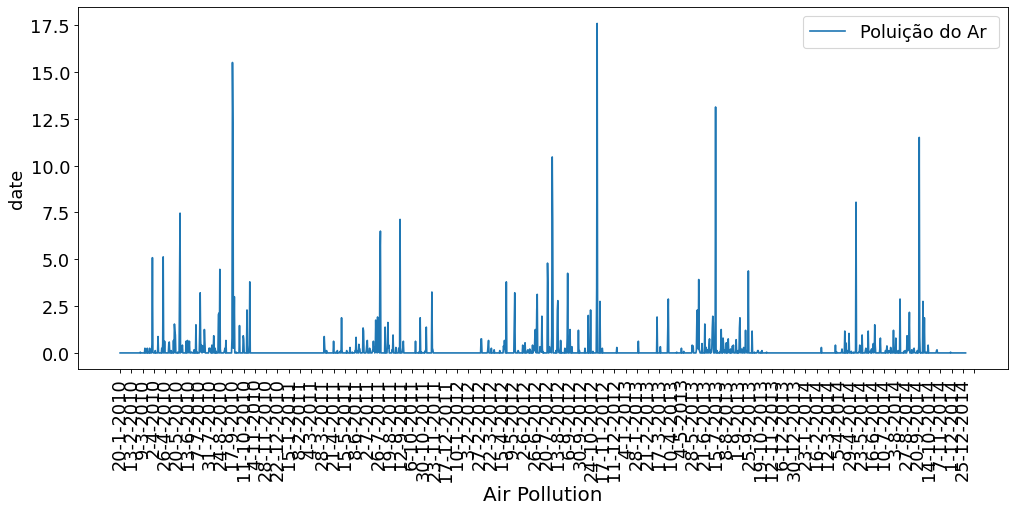

In [ ]:
plt.figure(figsize=(15, 6),dpi=80)
data_horario = pd.read_csv('air_pollution.csv')
data_horario['date'] = pd.DatetimeIndex(data_horario['date']).day.map(str)+'-'+ pd.DatetimeIndex(data_horario['date']).month.map(str)+'-' + pd.DatetimeIndex(data_horario['date']).year.map(str)
plt.plot(data_horario.iloc[18:,0],data_horario.iloc[18:,-2])
plt.legend(['Poluição do Ar '],fontsize=16)
plt.xlabel('Air Pollution',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_horario), 24),fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('date',fontsize=16)



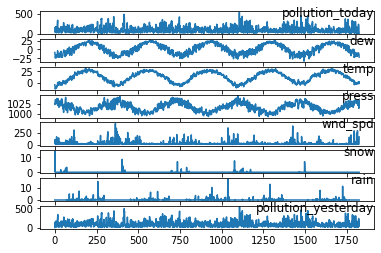

In [ ]:
values = air_pollution.values
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(air_pollution.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

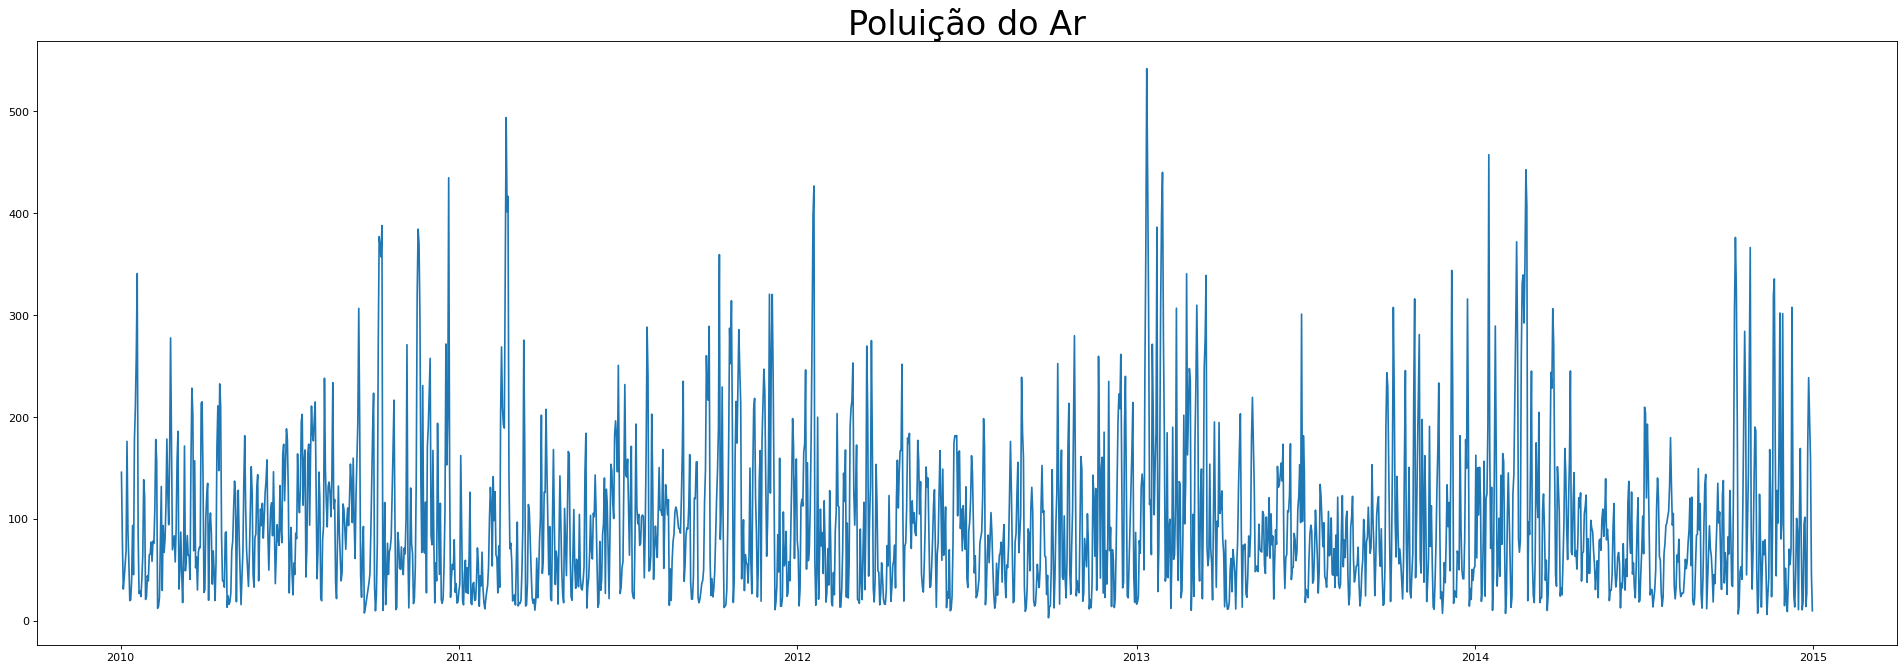

In [ ]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Poluição do Ar', fontsize=30)

plt.plot(air_pollution.pollution_today)
plt.savefig("pollution.png")

**Análise de correlação entre séries**

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
pollution_today,1.000000,0.148133,-0.080849,-0.031321,-0.284662,0.028893,-0.050574,0.568445
dew,0.148133,1.000000,0.906020,-0.801776,-0.334133,-0.055574,0.176558,0.065677
temp,-0.080849,0.906020,1.000000,-0.865277,-0.217490,-0.133997,0.093423,-0.058848
press,-0.031321,-0.801776,-0.865277,1.000000,0.214193,0.101694,-0.113859,0.015165
wnd_spd,-0.284662,-0.334133,-0.217490,0.214193,1.000000,0.019842,-0.007890,-0.114668
snow,0.028893,-0.055574,-0.133997,0.101694,0.019842,1.000000,-0.014704,0.055010
rain,-0.050574,0.176558,0.093423,-0.113859,-0.007890,-0.014704,1.000000,0.054487
pollution_yesterday,0.568445,0.065677,-0.058848,0.015165,-0.114668,0.055010,0.054487,1.000000


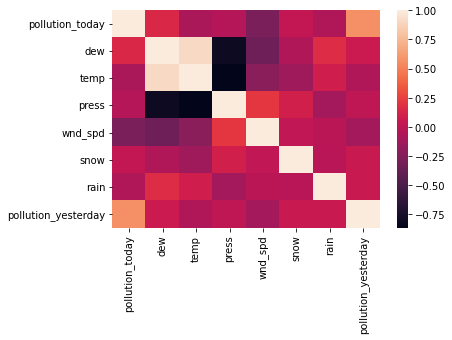

In [ ]:
sbn.heatmap(data_horario.corr())
data_horario.corr()

**Decomposição de séries**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


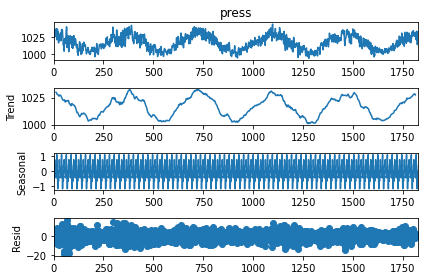

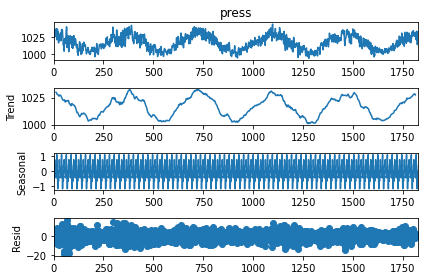

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(data_horario.iloc[:,4],model="additive",freq=24)

decompose_result.plot()

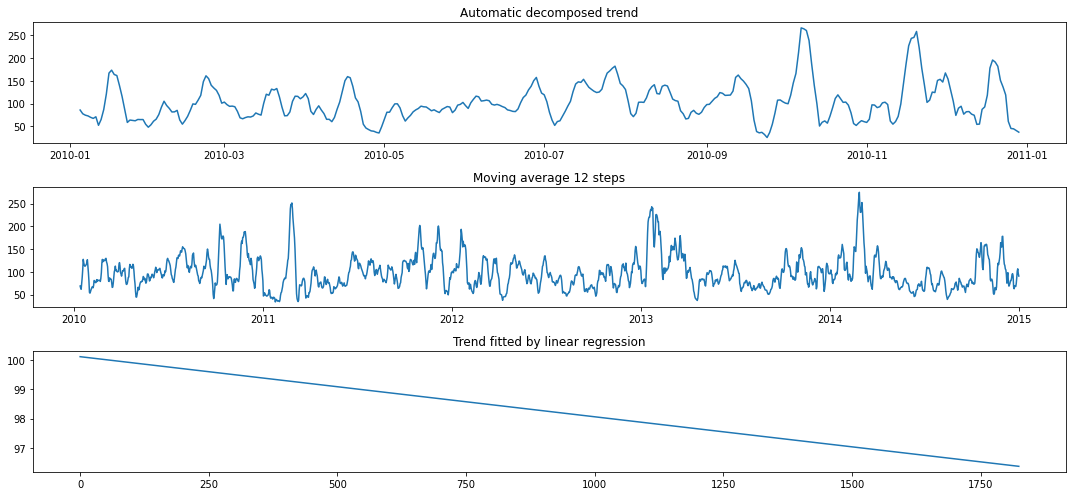

In [ ]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = air_pollution.pollution_today.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 12 steps")


X = [i for i in range(0, len(air_pollution.pollution_today))]
X = np.reshape(X, (len(X), 1))
y = air_pollution.pollution_today.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

Podemos ver que a série não tem uma tendência forte, os resultados da decomposição automática e da média móvel parecem mais um efeito de sazonalidade + ruído aleatório do que uma tendência. Isso foi confirmado com a regressão linear, que não consegue encontrar a série corretamente e nos dá uma tendência ruim.

**Seasonality**


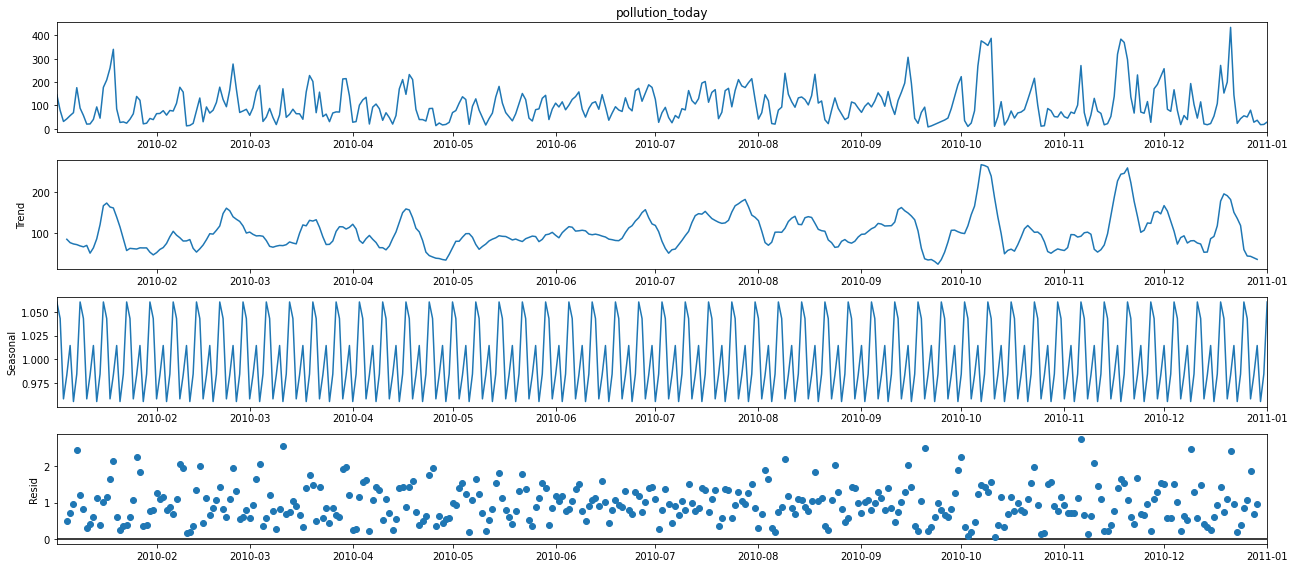

<Figure size 4000x1600 with 0 Axes>

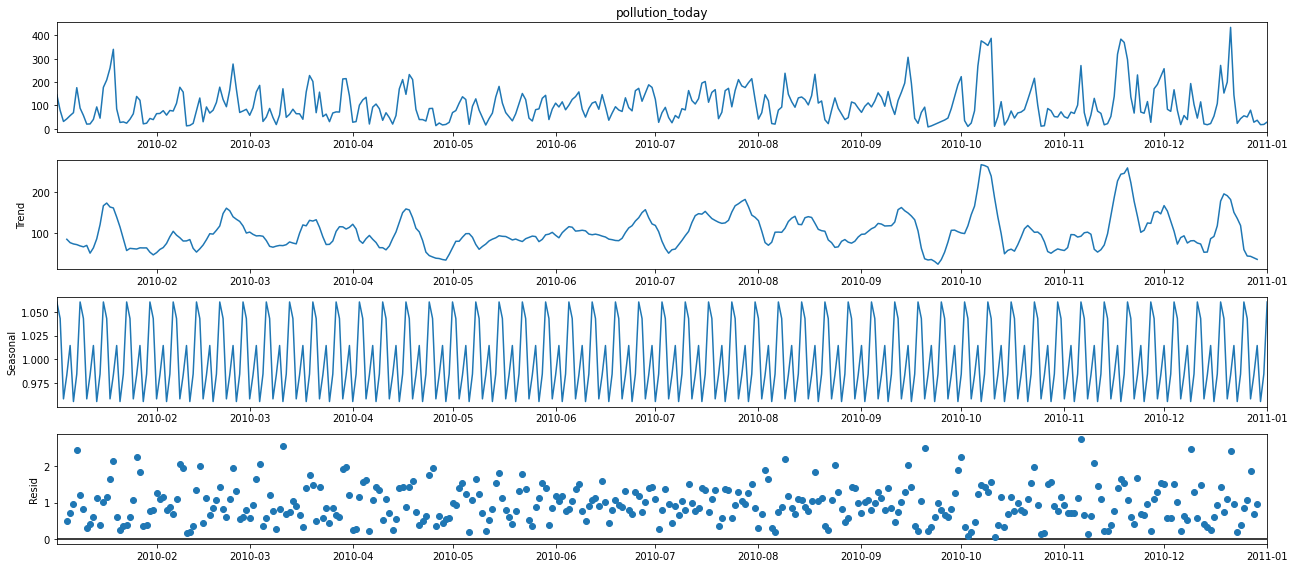

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = air_pollution.pollution_today[:365]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

Aqui pode se ver uma clara tendência semanal, 4 picos todos os meses (semanal)

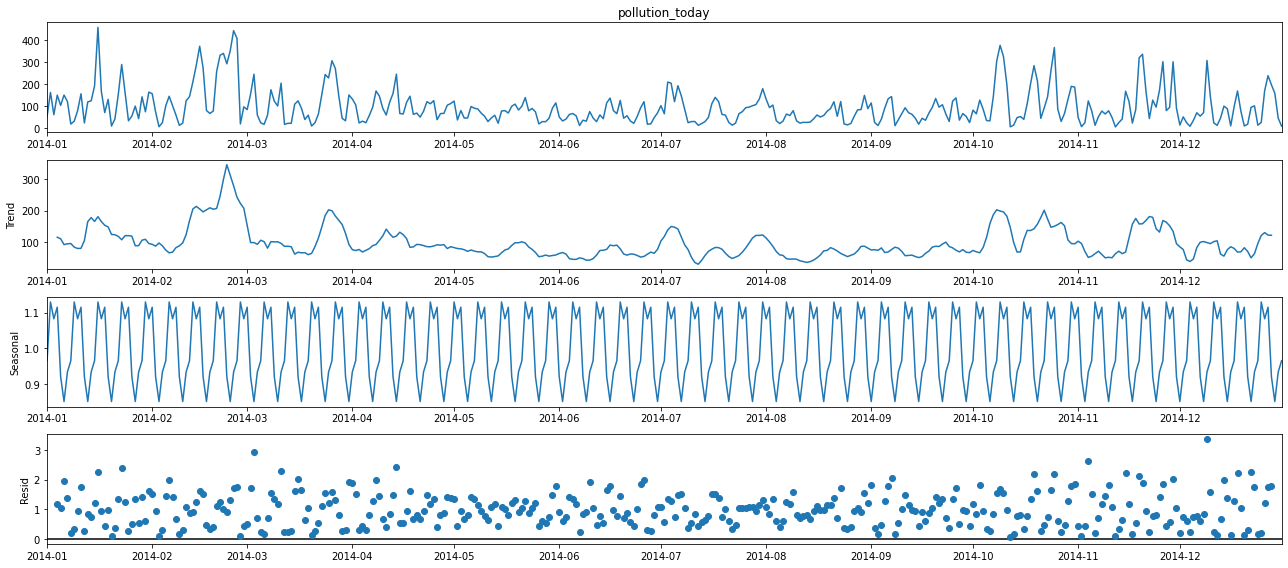

<Figure size 4000x1600 with 0 Axes>

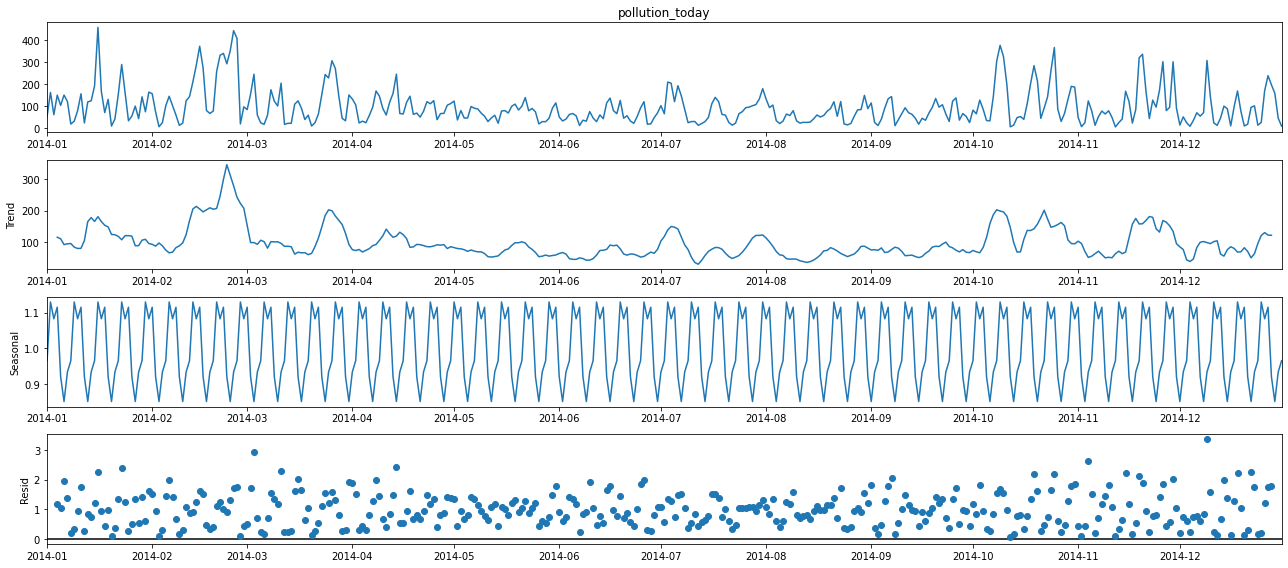

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = air_pollution.pollution_today[-365:]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

Aqui vemos outra sazonalidade semanal (4 picos entre cada mês), mas um pouco diferente da original, isso é algo que sempre devemos esperar de conjuntos de dados reais, pois suas sazonalidades nunca serão perfeitas, mas uma combinação de múltiplos.


**Análise de Autocorrelação**

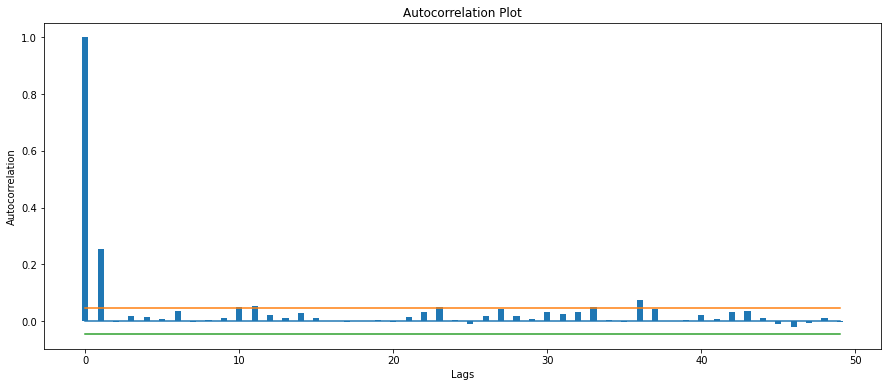

In [ ]:
def acf_plot(data,lags):
    values=[]
    for i in range((lags)):
        values.append(data.autocorr(i))
    plt.figure(figsize=(15,6))
    plt.plot(np.zeros_like(values))
    plt.plot(np.ones_like(values)*1.96*(1/np.sqrt(len(data))))
    plt.plot(np.ones_like(values)*(-1.96)*(1/np.sqrt(len(data))))
    plt.bar(range(lags),values,width=0.4)
    plt.title('Autocorrelation Plot')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

acf_plot(data_horario.iloc[:,7],50)

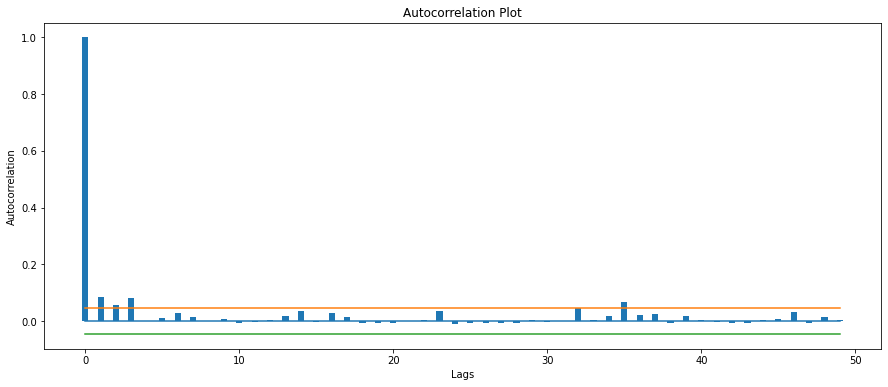

In [ ]:
acf_plot(data_horario.iloc[:,6],50)

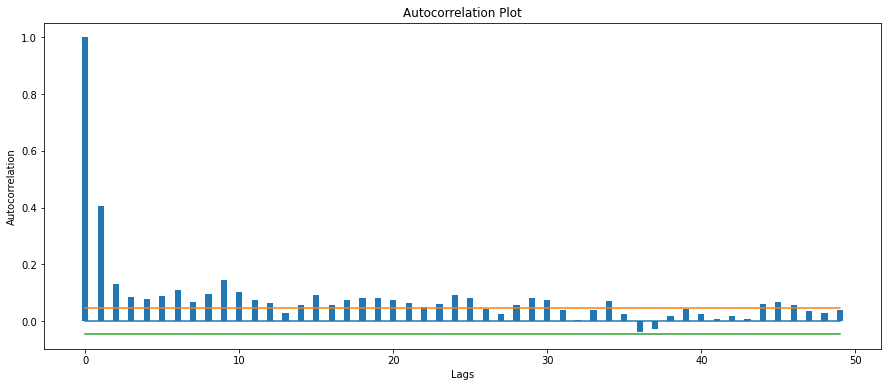

In [ ]:
acf_plot(data_horario.iloc[:,5],50)

Testes estatísticos para estacionariedade: **Augmented Dickey-Fuller**


In [ ]:
X = air_pollution.pollution_today.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -10.116719
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Testes estatísticos para estacionariedade: Augmented Dickey-Fuller Exemplo com a série PM2.5

ADF Statistic: -3.090802
p-value: 0.027241
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


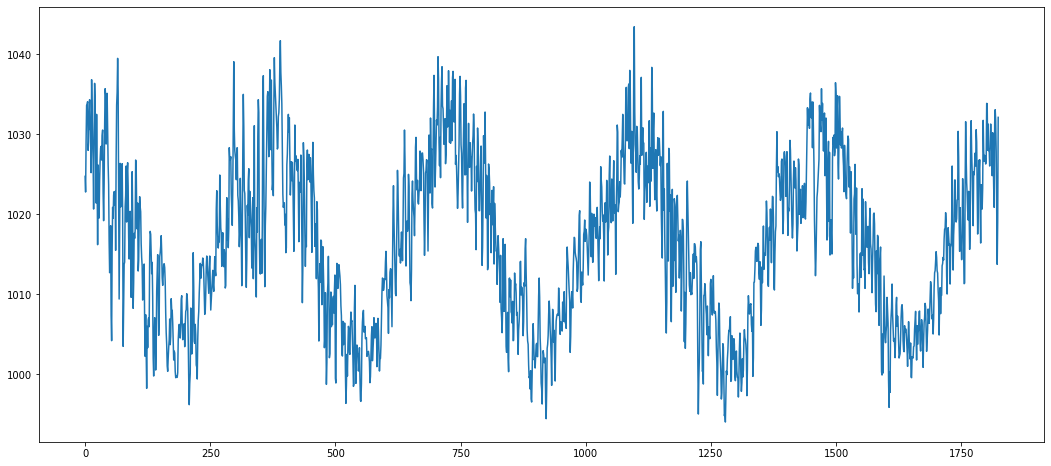

In [ ]:
res=adfuller(data_horario.iloc[:,4])
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
	print('\t%s: %.3f' % (key, value))
plt.plot(range(len(data_horario.iloc[:,4])),data_horario.iloc[:,4])

Previsão da base Air Pollution

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


[ 0.14827511  0.36764852 -0.13983451  0.06981141]


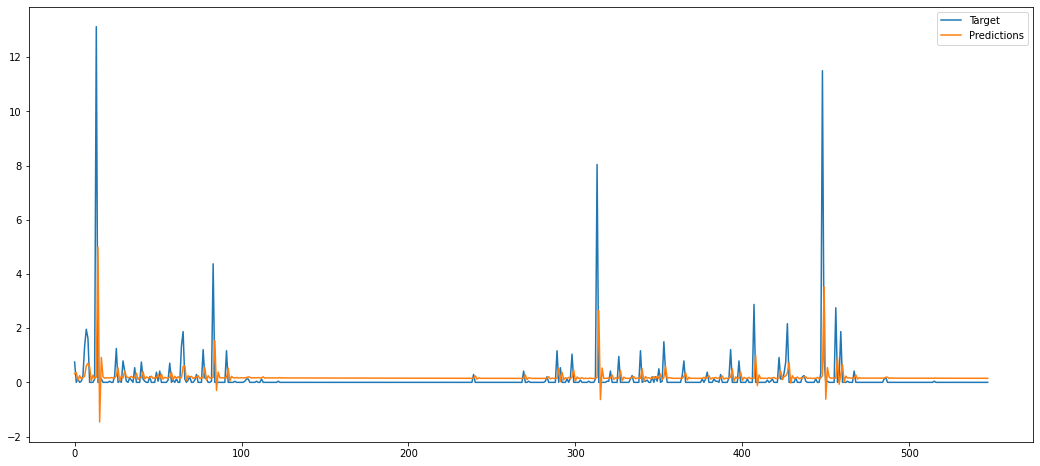

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot as plt


data = pd.read_csv('air_pollution.csv')
data_v = data.iloc[:,-2].values
trainSize = np.int32(np.floor(0.7*len(data_v)))
testSize = len(data_v)-trainSize
x_treino = data_v[:trainSize]
x_test = data_v[trainSize:]
xl=x_treino.tolist()
startpoint=len(x_treino)

armodel = AutoReg(x_treino,lags=3).fit()
print(armodel.params)
predictions=[]
predictions.append(armodel.model.predict(armodel.params,start=startpoint,end=startpoint))
startpoint=startpoint+1

for i in range(len(x_test)-1):
  xl.append(x_test[i])
  armodel = AutoReg(xl,lags=3).fit()
  predictions.append(armodel.model.predict(armodel.params,start=startpoint,end=startpoint))
  startpoint=startpoint+1


plt.plot(range(len(x_test)),x_test,range(len(x_test)),predictions)
plt.legend(['Target','Predictions'])

# **Parte 2**

Estudo de processo **AR(1)**

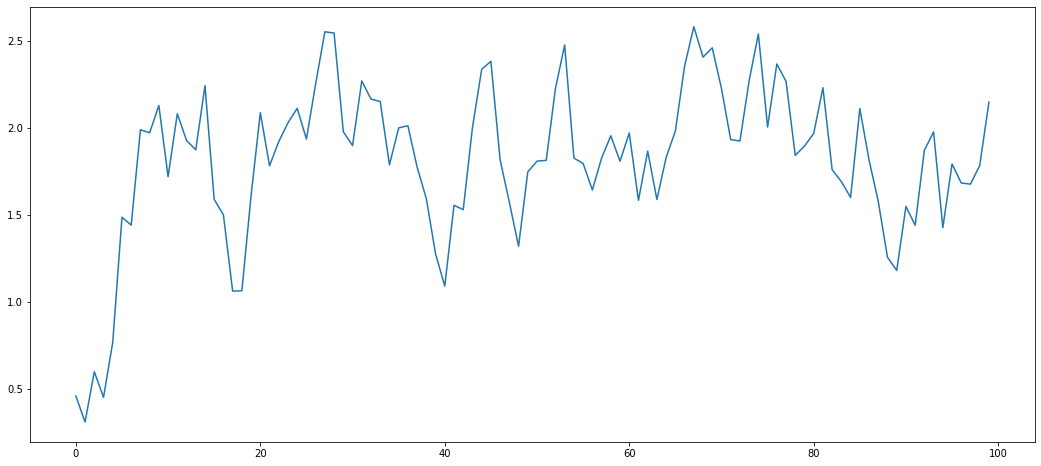

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
np.random.seed(35)
x=np.random.uniform(size =100)
w=np.random.uniform(size =100)
for i in range(2,100,1):
  x[i]=0.7*x[i-1]+w[i]
plt.plot(x)


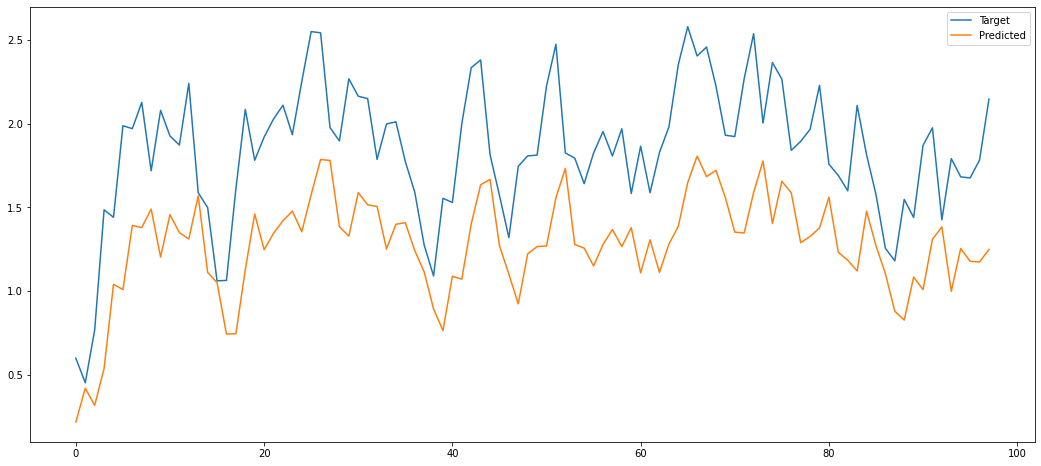

In [ ]:
preds=[]
for i in range(2,100,1):
  preds.append(0.7*x[i-1])
plt.plot(range(len(x[2:])),x[2:],range(len(x[2:])),preds)
plt.legend(['Target','Predicted'])


**Estudo da aucorrelação Parcial**

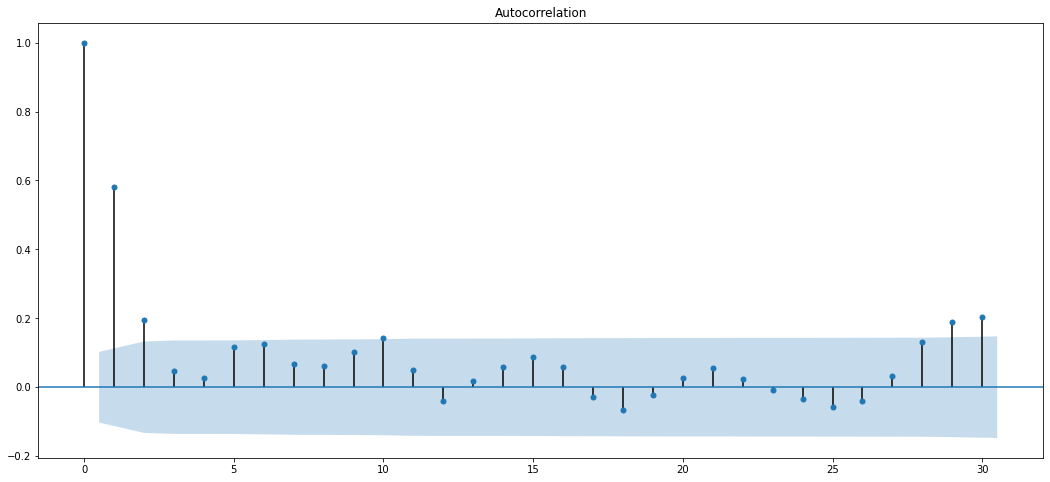

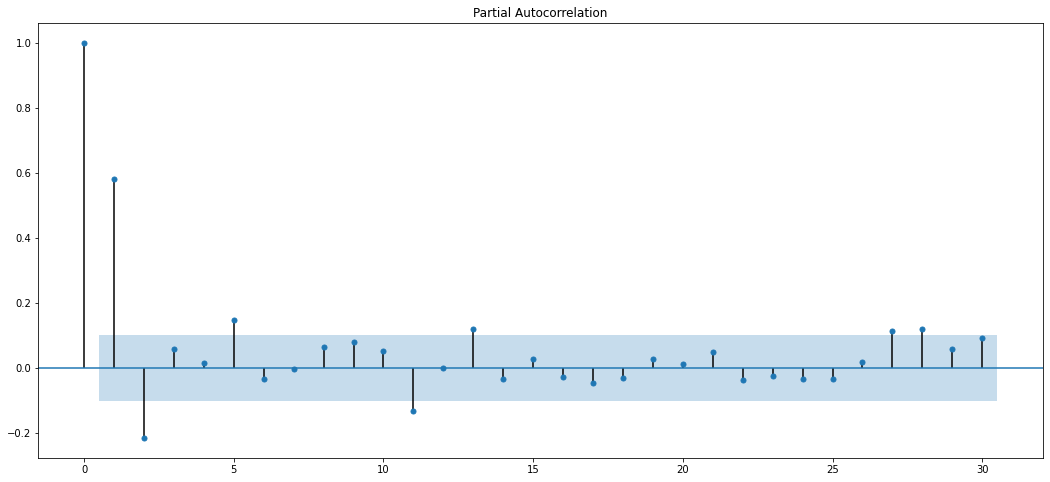

In [ ]:
plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

Vimos que os valores de séries temporais não estão correlacionados com pontos distantes no tempo, isso é bom e mostra que as séries devem ser estacionárias, mas para confirmar, testaremos com alguns outros métodos


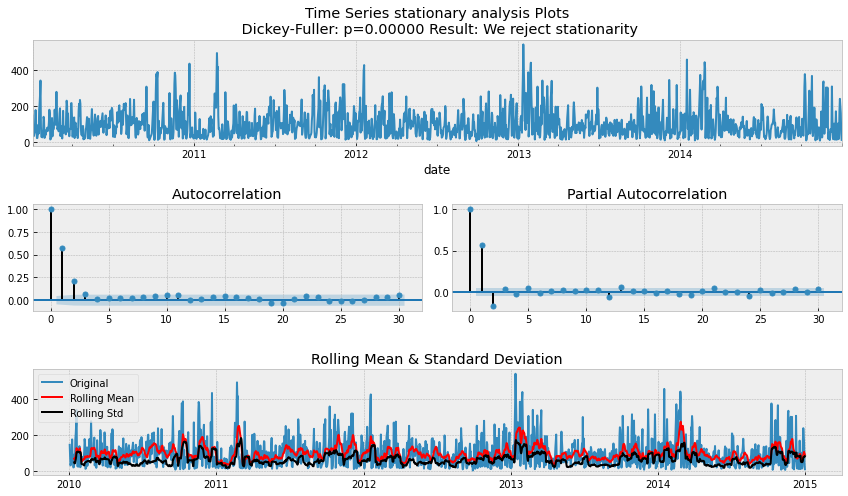

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "We reject stationarity" if p_value <= 0.05 else "We can not reject stationarity"
        ts_ax.set_title(
            'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = air_pollution.pollution_today.rolling(window=12).mean()
        rolstd = air_pollution.pollution_today.rolling(window=12).std()

        # Plot rolling statistics:
        orig = plt.plot(air_pollution.pollution_today, label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')


tsplot(air_pollution.pollution_today, lags=30)

# A base de dados é estacionária

Exemplo Rolling AR

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 24.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


[2.19636382 2.11743473 2.06062842 2.01974415 1.9903192  1.96914167
 1.95389991 1.94293022 1.93503519 1.92935303 1.9252635  1.92232021
 1.92020189 1.9186773  1.91758004 1.91679032 1.91622195 1.91581289
 1.91551848 1.91530659 1.91515409 1.91504434 1.91496534 1.91490849
 1.91486757 1.91483812 1.91481693 1.91480168 1.9147907  1.9147828 ]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  return self._hold_back


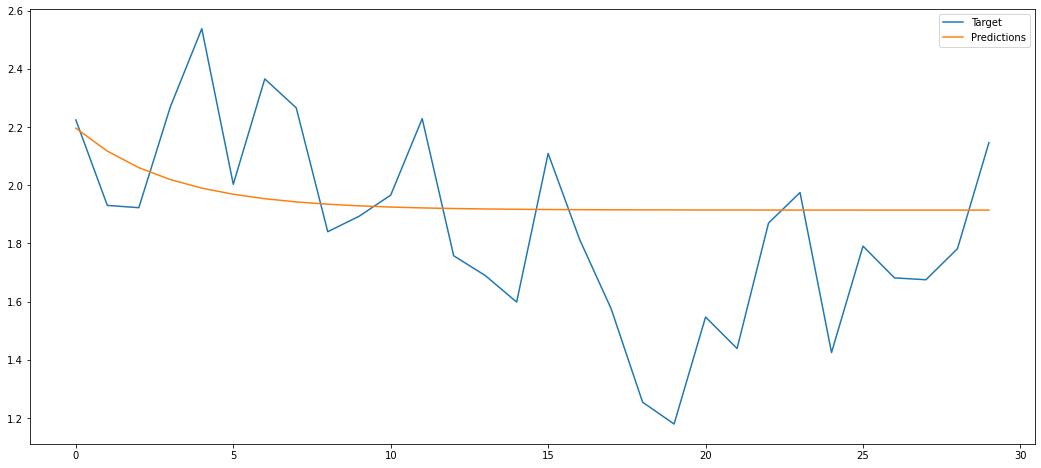

In [ ]:

from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
x_train = x[1:70]
x_test = x[70:]
armodel = AutoReg(x_train,lags=1).fit()
predictions = armodel.model.predict(armodel.params,start=70, end=99)
print(predictions)

plt.plot(range(len(x_test)),x_test,range(len(x_test)),predictions)
plt.legend(['Target','Predictions'])


**Previsão one-step**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  return self._hold_back


[0.44886418 0.7644439 ]


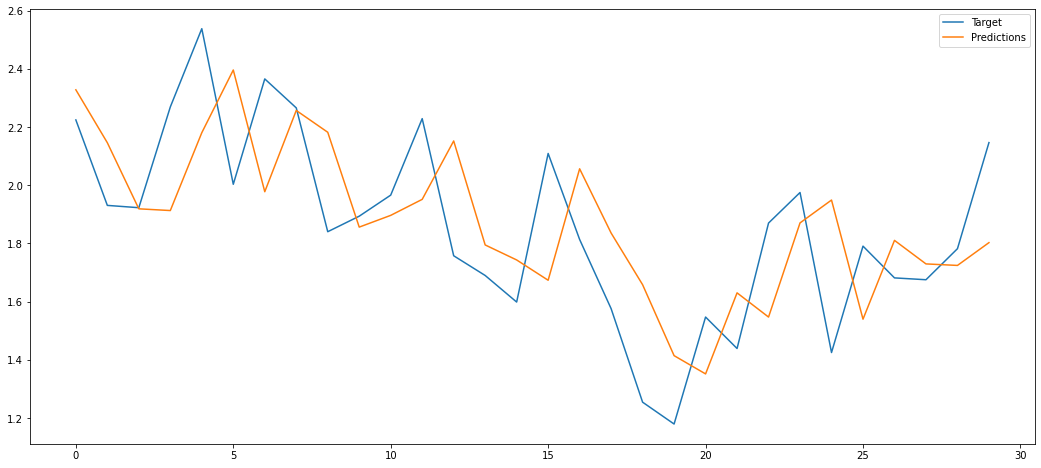

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
x_train = x[:70]
x_test = x[70:]
xl=x_train.tolist()
armodel = AutoReg(x_train,lags=1).fit()
print(armodel.params)
predictions=[]
startpoint=len(x_train)
predictions.append(armodel.model.predict(armodel.params,start=startpoint,end=startpoint))
startpoint=startpoint+1

for i in range(len(x_test)-1):
  xl.append(x_test[i])
  armodel = AutoReg(xl,lags=1).fit()
  predictions.append(armodel.model.predict(armodel.params,start=startpoint,end=startpoint))
  startpoint=startpoint+1


plt.plot(range(len(x_test)),x_test,range(len(x_test)),predictions)
plt.legend(['Target','Predictions'])


**Previsão da base Air Pollution**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  return self._hold_back


[ 0.19034508  0.90262177 -0.07786765  0.1619322 ]


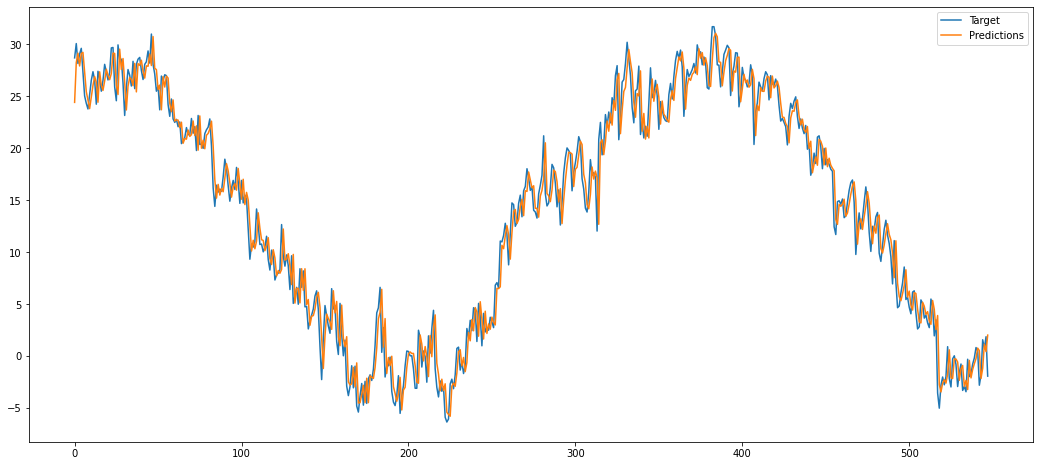

In [ ]:
data = pd.read_csv('air_pollution.csv')
data_v = data.iloc[:,3].values
trainSize = np.int32(np.floor(0.7*len(data_v)))
testSize = len(data_v)-trainSize
x_treino = data_v[:trainSize]
x_test = data_v[trainSize:]
xl=x_treino.tolist()
startpoint=len(x_treino)
#plot_acf(x_treino,lags=100)
#plot_pacf(x_treino,lags=100)
armodel = AutoReg(x_treino,lags=3).fit()
print(armodel.params)
predictions=[]
predictions.append(armodel.model.predict(armodel.params,start=startpoint,end=startpoint))
startpoint=startpoint+1

for i in range(len(x_test)-1):
  xl.append(x_test[i])
  armodel = AutoReg(xl,lags=3).fit()
  predictions.append(armodel.model.predict(armodel.params,start=startpoint,end=startpoint))
  startpoint=startpoint+1


plt.plot(range(len(x_test)),x_test,range(len(x_test)),predictions)
plt.legend(['Target','Predictions'])

**MODELOS ARMA**

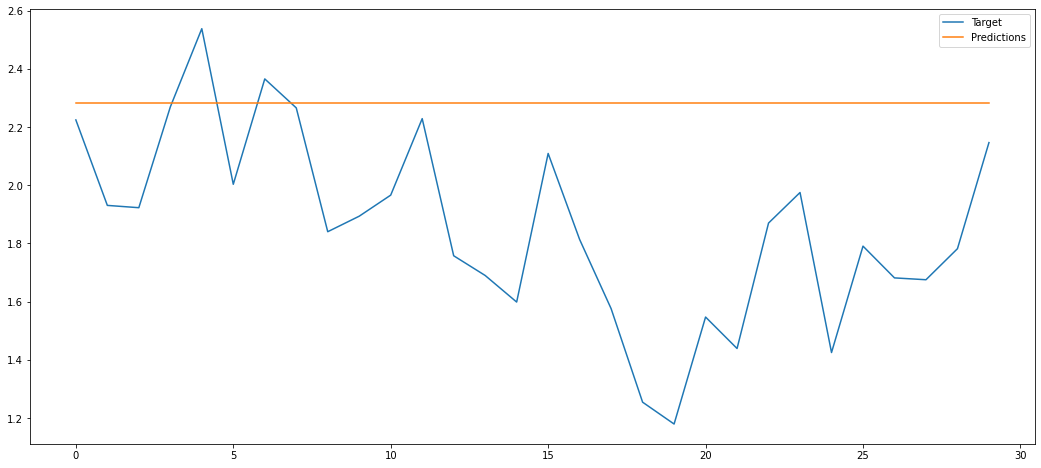

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
np.random.seed(35)
x=np.random.uniform(size =100)
w=np.random.uniform(size =100)
for i in range(2,100,1):
  x[i]=0.7*x[i-1]+w[i]
#plot_acf(x,lags=20)
#plot_pacf(x,lags=20)


predictions=[]
startpoint=70
modelo_arma = ARIMA(x[:70], order=(1, 0, 2)).fit()
predictions.append(modelo_arma.forecast())
#startpoint=startpoint+1
for i in range(29):
  modelo_arma = ARIMA(x[:startpoint], order=(1, 0, 2)).fit()
  predictions.append(modelo_arma.forecast())
  #startpoint=startpoint+1

plt.plot(range(30),x[70:],range(30),predictions)
plt.legend(['Target','Predictions'])
plt.show()


**Métricas de Erro - Mean Squared Error**


In [ ]:
from sklearn.metrics import mean_squared_error as mse 
erro = mse(x[70:],predictions)
print('Erro ARMA(1,0,2) = %f'%erro)

Erro ARMA(1,0,2) = 0.283112


Seleção Automática da Ordem do Modelo

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 33.8 MB/s 


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('air_pollution.csv')
data_v = data.iloc[:,4].values
trainSize = np.int32(np.floor(0.7*len(data_v)))
testSize = len(data_v)-trainSize
x_treino = data_v[:trainSize]
x_test = data_v[trainSize:]
xl = x_treino.tolist()
predictions=[]
for i in range(len(x_test)-1):
  xl.append(x_test[i])




**Parte 3**

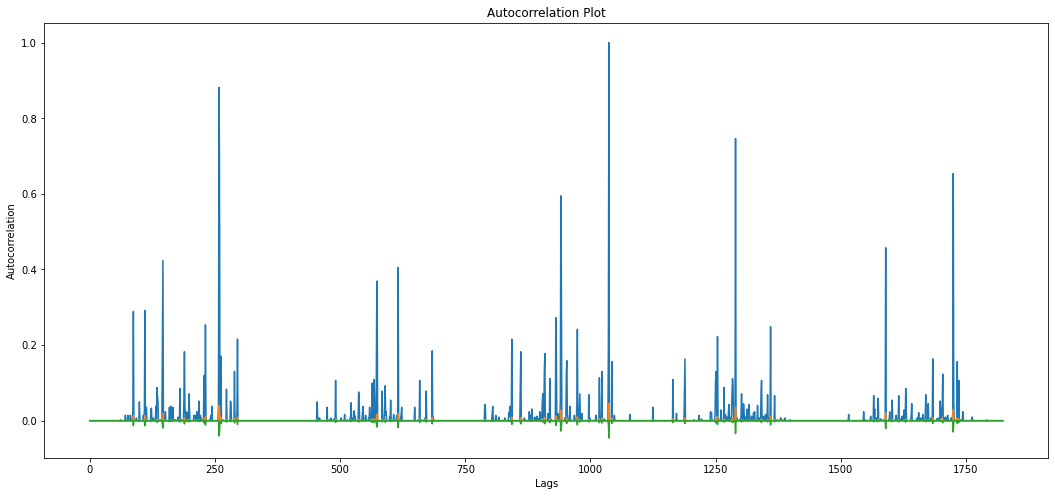

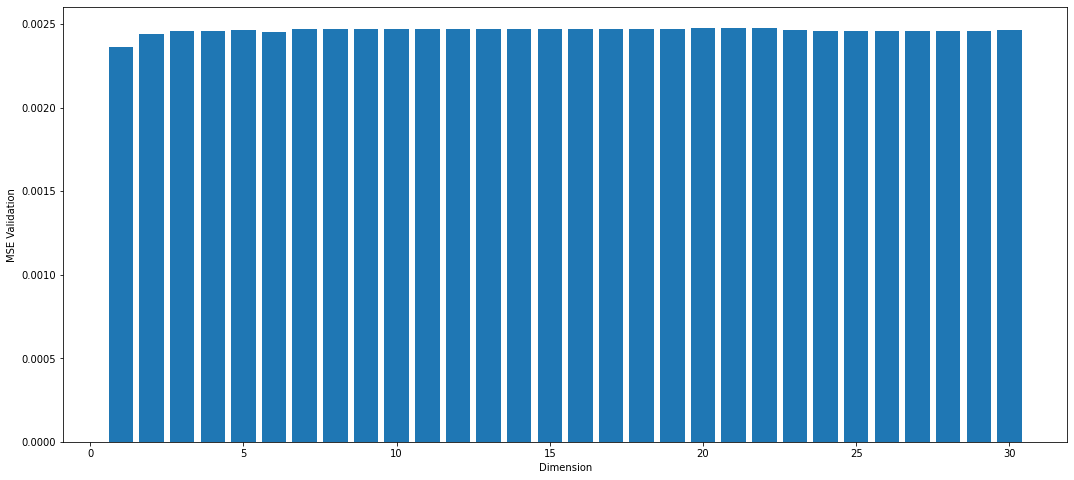

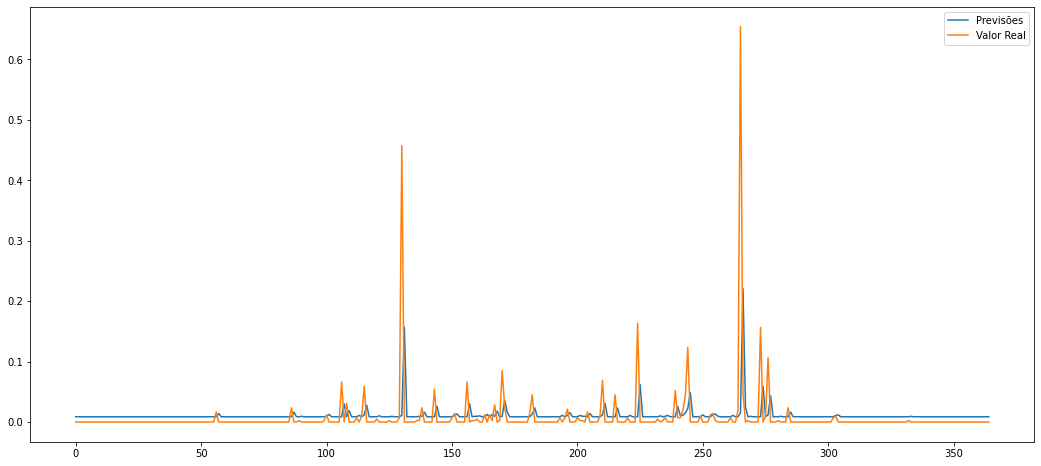

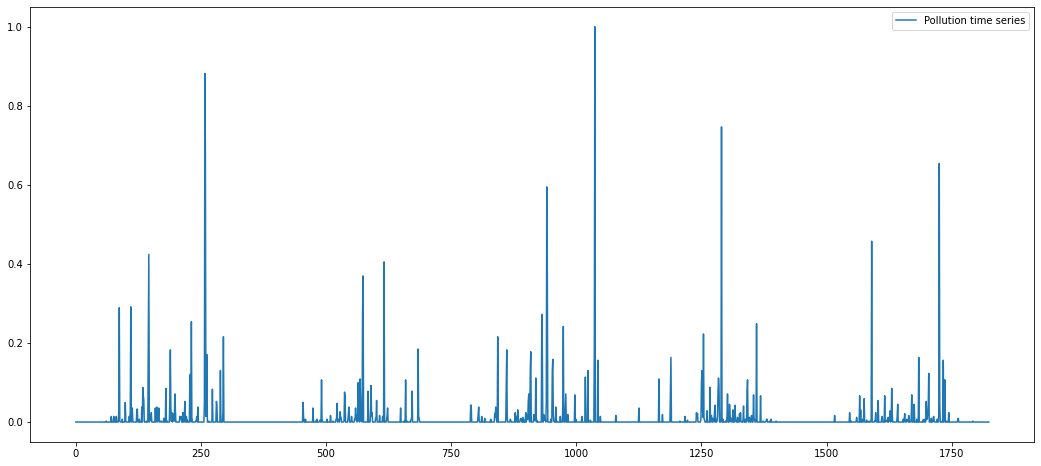

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt

data = pd.read_csv('air_pollution.csv')
data = data.iloc[:,-2].values



def acf_plot(data,lags): # função que calcula a autocorrelação
    values=[]
    for i in range((lags)):
        values.append(data.autocorr(i))
   
    plt.plot(data)
    plt.plot(data*1.96*(1/np.sqrt(len(data))))
    plt.plot(data*(-1.96)*(1/np.sqrt(len(data))))
    plt.bar(range(lags),values,width=0.4)
    plt.title('Autocorrelation Plot')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()
    
trainSplit = 0.6 # Usado para treinar o modelo
validSplit= 0.2  #Verificar se o modelo é adequado



#dataset = np.loadtxt('pollutn.txt')
dataset = data


trainSize = int(np.floor(trainSplit*len(dataset)))
validSize = int(np.floor(validSplit*len(dataset)))

maxData = np.max(dataset[0:trainSize])
minData = np.min(dataset[0:trainSize])

ndataset  = (dataset  - minData)/(maxData-minData)


datasetSeries = pd.Series(ndataset)  #transformar em séries colunas do dataframe
acf_plot(datasetSeries,40)
dimension = 30
stepahead = 1





bestValue = 10**10
model=0
erroBar = []

for dim in range(1,dimension+1,1):
    #treinamento
    datasetShifted = pd.concat([datasetSeries.shift(i) for i in range(dim+stepahead) ],axis=1) # cria várias colunas deslocadas com os legs
    train = (datasetShifted.iloc[dim:trainSize,1:])
    train = np.hstack((train,np.ones_like(train.iloc[:,0].values.reshape(len(train),1))))
    trainTarget = (datasetShifted.iloc[dim:trainSize,0])
    #validação
    valid = datasetShifted.iloc[trainSize:(validSize+trainSize),1:]
    valid=np.hstack((valid,np.zeros_like(valid.iloc[:,0].values.reshape(len(valid),1))))
    validTarget = datasetShifted.iloc[trainSize:(validSize+trainSize),0]
    #teste
    test = datasetShifted.iloc[(validSize+trainSize):,1:]
    test= np.hstack((test,np.ones_like(test.iloc[:,0].values.reshape(len(test),1))))
    testTarget = datasetShifted.iloc[(validSize+trainSize):,0]
    
    #
    X_inv = np.linalg.pinv(train) #calcula a inversa da matrix de treinamento
    coefs = X_inv.dot(trainTarget) # calcula os coeficientes
    #
    predVal = coefs.dot(valid.T) #
    erro = mse(predVal,validTarget) #
    #
    erroBar.append(erro)  #
    if(erro<bestValue):
        bestValue=erro     
        model=coefs
        test_aux = test
        testTarget_aux = testTarget 
    
    
plt.bar(range(1,dimension+1,1),erroBar)
plt.xlabel('Dimension')
plt.ylabel('MSE Validation')
plt.show()


predTest = model.dot(test_aux.T)

mse_test = mse(predTest,testTarget_aux)

plt.plot(predTest)
plt.plot(testTarget_aux.values)
plt.legend(['Previsões','Valor Real'])
plt.show()

plt.plot(datasetSeries)
plt.legend(['Pollution time series'])
plt.show()

In [ ]:
datasetShifted

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00237,0.00000,0.00000
1821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00237,0.00000
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00237
1823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000


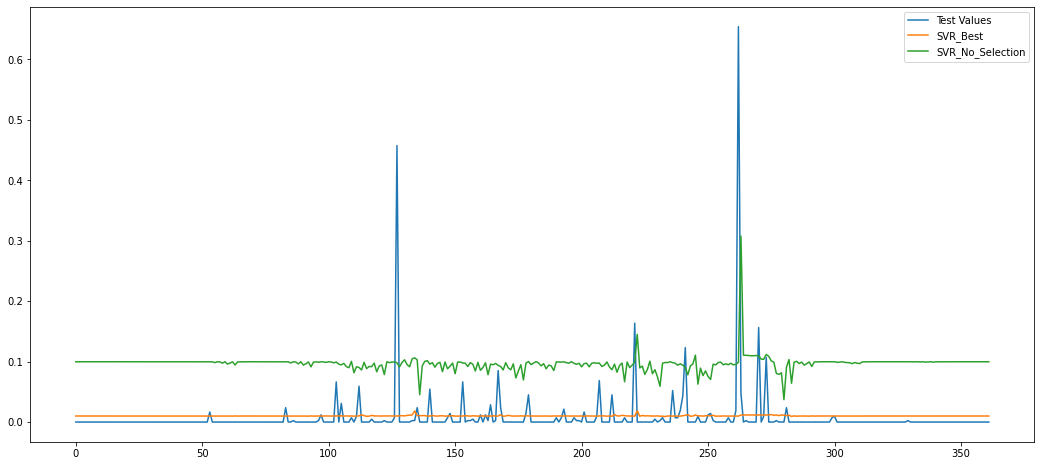

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR # support vector regression 
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
trainSplit = 0.6
validSplit= 0.2

data = pd.read_csv('air_pollution.csv')
dataset = data.iloc[18:,-2].values


#dataset = np.loadtxt('pollutn.txt')
trainSize = int(np.floor(trainSplit*len(dataset)))
validSize = int(np.floor(validSplit*len(dataset)))

maxData = np.max(dataset[0:trainSize])
minData = np.min(dataset[0:trainSize])

ndataset  = (dataset  - minData)/(maxData-minData)


datasetSeries = pd.Series(ndataset)
dimension = 12
stepahead = 1
datasetShifted = pd.concat([datasetSeries.shift(i) for i in range(dimension+stepahead) ],axis=1)

train = (datasetShifted.iloc[dimension:trainSize,1:])
trainTarget = (datasetShifted.iloc[dimension:trainSize,0])

valid = datasetShifted.iloc[trainSize:(validSize+trainSize),1:]
validTarget = datasetShifted.iloc[trainSize:(validSize+trainSize),0]

test = datasetShifted.iloc[(validSize+trainSize):,1:]
testTarget = datasetShifted.iloc[(validSize+trainSize):,0]



g=(10.0)**np.arange(-5,3,1) #10
e = (10.0)**np.arange(-4,-1,1) # 10
c=(10.0)**np.arange(-2,3,1)#10
bestValue = 10**100000
erroval = []
param=[]
bestSVR=0
for i in g:
    for j in e:
        for k in c:

            mySVR = SVR(C=k,gamma=i,epsilon=j)
            mySVR.fit(train,trainTarget)
            
            predVals = mySVR.predict(valid)
            erro = mse(predVals,validTarget)
            erroval.append(erro)
            param.append((i,j,k))
            if erro<bestValue:
                bestValue=erro
                bestSVR = mySVR


predTest = bestSVR.predict(test)
mseTest = mse(predTest,testTarget)

SVR_no_Selection = SVR()
SVR_no_Selection.fit(train,trainTarget)
predTestNoSelection = SVR_no_Selection.predict(test)

mseTest_noSelection = mse(predTestNoSelection,testTarget)



plt.plot(testTarget.values)
plt.plot(predTest)
plt.plot(predTestNoSelection)
#plt.plot(predSVRGridCV)
plt.legend(['Test Values','SVR_Best','SVR_No_Selection'])

In [ ]:
datasetShifted


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
